In [3]:
import pandas as pd

# Read your CSV file
df = pd.read_csv(r'C:\Users\ayedr\amharic-ecommerce-ner\data\raw\all_messages.csv', encoding='utf-8')

# Display first few rows
print(df.head())

# Check data types
print(df.dtypes)

             timestamp      sender_id  \
0  2025-06-18 06:01:10 -1001307493052   
1  2025-06-16 12:21:00 -1001307493052   
2  2025-06-16 05:11:57 -1001307493052   
3  2025-06-16 05:11:57 -1001307493052   
4  2025-06-16 05:11:57 -1001307493052   

                                        message_text   views        channel  
0  💥💥...................................💥💥\n\n📌Im...  1966.0  @ZemenExpress  
1  💥💥...................................💥💥\n\n📌 B...  3067.0  @ZemenExpress  
2                                                NaN  3142.0  @ZemenExpress  
3                                                NaN  3203.0  @ZemenExpress  
4                                                NaN  3169.0  @ZemenExpress  
timestamp        object
sender_id         int64
message_text     object
views           float64
channel          object
dtype: object


In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df[df['message_text'].notna()]

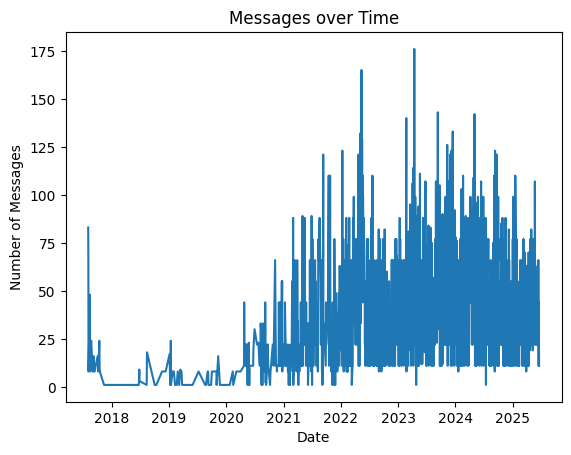

In [5]:
import matplotlib.pyplot as plt

# Count messages per day
messages_per_day = df['timestamp'].dt.date.value_counts().sort_index()

# Plot
messages_per_day.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.title('Messages over Time')
plt.show()

Total messages: 58946
channel
@ZemenExpress              53185
@nevacomputer               4264
@Shageronlinestore           608
@ethio_brand_collection      511
@Leyueqa                     176
@meneshayeofficial           142
@Fashiontera                  44
@modernshoppingcenter         16
Name: count, dtype: int64


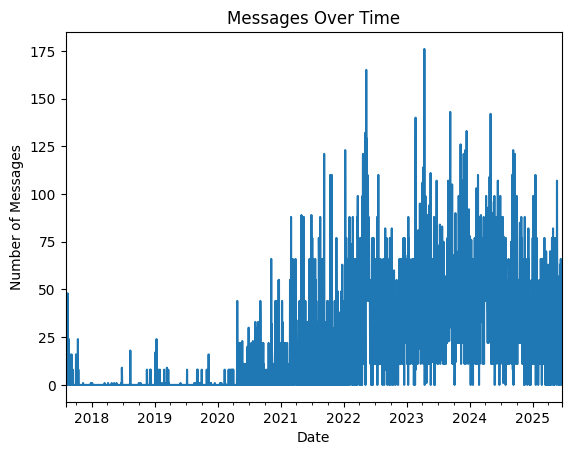

In [6]:
# Check total number of messages
print(f"Total messages: {len(df)}")

# Messages per channel
print(df['channel'].value_counts())

# Distribution of messages over time
import matplotlib.pyplot as plt

# Plot messages over time
df.set_index('timestamp').resample('D').size().plot()
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.title('Messages Over Time')
plt.show()

In [13]:
import os

channels_to_keep = [
    '@ZemenExpress',
    '@nevacomputer',
    '@ethio_brand_collection',
    '@Leyueqa',
    '@Shageronlinestore'
]

# Filter your DataFrame
df_filtered = df[df['channel'].isin(channels_to_keep)]

# Print value counts and total
print(df_filtered['channel'].value_counts())
print(f"Total messages after filtering: {len(df_filtered)}")

# Define the folder path
folder_path = r"C:\Users\ayedr\amharic-ecommerce-ner\data\raw"

# Define new filename
new_filename = "filtered_channels.csv"

# Join folder path and filename
save_path = os.path.join(folder_path, new_filename)

# Save the filtered DataFrame
df_filtered.to_csv(save_path, index=False)
print(f"Filtered data saved to {save_path}")

channel
@ZemenExpress              53185
@nevacomputer               4264
@Shageronlinestore           608
@ethio_brand_collection      511
@Leyueqa                     176
Name: count, dtype: int64
Total messages after filtering: 58744
Filtered data saved to C:\Users\ayedr\amharic-ecommerce-ner\data\raw\filtered_channels.csv


In [8]:
#Basic text analysis: message length, most common words, etc.

# Add a column for message length
df['message_length'] = df['message_text'].apply(lambda x: len(str(x)))

# Summary statistics
print(df['message_length'].describe())

# Most common words
from collections import Counter
import re

# Combine all messages into one string
all_text = ' '.join(df['message_text'].dropna().astype(str)).lower()

# Remove non-alphabetic characters
words = re.findall(r'\b\w+\b', all_text)

# Count most common words
word_counts = Counter(words)
print(word_counts.most_common(10))

count    58946.000000
mean       470.293184
std        200.131191
min          1.000000
25%        361.000000
50%        482.000000
75%        589.000000
max       2165.000000
Name: message_length, dtype: float64
[('ቁ', 110419), ('ፎቅ', 64366), ('https', 52463), ('me', 52224), ('telegram', 49499), ('0902660722', 49247), ('አድራሻ', 48615), ('zemenexpress', 48422), ('0928460606', 48378), ('ለማዘዝ', 48274)]


In [1]:
pip install emoji

   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ----------------- ---------------------- 262.1/590.6 kB ? eta -:--:--
   ----------------- ---------------------- 262.1/590.6 kB ? eta -:--:--
   --------------------------------- ---- 524.3/590.6 kB 578.7 kB/s eta 0:00:01
   -------------------------------------- 590.6/590.6 kB 553.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
#Remove emojis with emoji library
#Normalize text with unicodedata
#Tokenize with nltk
import emoji
import unicodedata
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def remove_emojis(text):
    return emoji.replace_emoji(text, replace='')

def normalize_amharic(text):
    text = unicodedata.normalize('NFKD', text)
    text = ''.join([c for c in text if not unicodedata.combining(c)])
    return text

# Apply preprocessing steps
df['text_no_emoji'] = df['message_text'].apply(lambda x: remove_emojis(str(x)))
df['text_normalized'] = df['text_no_emoji'].apply(lambda x: normalize_amharic(str(x)))
df['tokens'] = df['text_normalized'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayedr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
